In [15]:
# Sentiment Prediction

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('./final_dataset.csv')

# Drop rows with missing values
df.dropna(inplace=True)
# Assuming 'sentiment' column contains continuous values
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x > 0 else (0 if x == 0 else -1))


# Preprocess the text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    words = word_tokenize(text)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['body'] = df['body'].apply(preprocess_text)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['body'], df['sentiment'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Support Vector Machine (SVM) classifier
clf = SVC(kernel='linear')
clf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', report)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulpudurkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahulpudurkar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rahulpudurkar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.7575757575757576

Classification Report:
               precision    recall  f1-score   support

          -1       0.79      0.70      0.75        44
           0       0.80      0.63      0.71        19
           1       0.71      0.89      0.79        36

    accuracy                           0.76        99
   macro avg       0.77      0.74      0.75        99
weighted avg       0.77      0.76      0.75        99



In [2]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import numpy as np

# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Function to preprocess a single sentence
def preprocess_sentence(sentence):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Remove special characters and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Convert to lowercase
    sentence = sentence.lower()
    # Tokenization
    words = word_tokenize(sentence)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Function to predict sentiment for a new sentence
def predict_sentiment(model, vectorizer, sentence):
    # Preprocess the input sentence
    preprocessed_sentence = preprocess_sentence(sentence)
    # Convert the preprocessed sentence to TF-IDF features
    sentence_tfidf = vectorizer.transform([preprocessed_sentence])
    # Make predictions using the trained model
    prediction = model.predict(sentence_tfidf)

    return prediction[0]
# Assuming 'clf' is your trained SVM model and 'vectorizer' is the TF-IDF vectorizer
# You need to have these objects from your training code
# Example usage:
new_sentence = "This has been a strong ecumenical view since forever, yet individual Christians keep doing stupid stuff like not believing in climate change." 

def map_to_sentiment_label(sentiment_value):
    if sentiment_value == 1:
        return 'positive'
    elif sentiment_value == -1:
        return 'negative'
    elif sentiment_value == 0:
        return 'neutral'
    else:
        return 'unknown'  # Handle other cases if needed
# Example usage:
predicted_sentiment_value = predict_sentiment(clf, vectorizer, new_sentence)
predicted_sentiment_label = map_to_sentiment_label(predicted_sentiment_value)
print(f'Predicted Sentiment: {predicted_sentiment_label}')

# print(f'Predicted Sentiment: {predicted_sentiment}')

Predicted Sentiment: positive


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulpudurkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahulpudurkar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rahulpudurkar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# Misinformation Prediction

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk
from sklearn.ensemble import RandomForestClassifier


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

train_df = pd.read_csv("misinformation_prediction.csv")

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove numbers
    text = ''.join([i for i in text if not i.isdigit()])

    # Tokenize
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(words)

train_df['processed_sentence'] = train_df['Titles'].apply(preprocess_text)

X_train, X_val, y_train, y_val = train_test_split(train_df['processed_sentence'], train_df['Riyal/Fake'], test_size=0.2, random_state=42)

# Convert text data to numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_val)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vectorized, y_train)

val_predictions_rf = rf_model.predict(X_val_vectorized)

accuracy_rf = accuracy_score(y_val, val_predictions_rf)
print(f"Validation Accuracy (Random Forest): {accuracy_rf:.2f}")
print("Classification Report (Random Forest):")
print(classification_report(y_val, val_predictions_rf))

Validation Accuracy (Random Forest): 0.95
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.90      1.00      0.95         9

    accuracy                           0.95        22
   macro avg       0.95      0.96      0.95        22
weighted avg       0.96      0.95      0.95        22



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahulpudurkar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulpudurkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rahulpudurkar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
test_sentence = "This was the hottest year ever"

processed_test_sentence = preprocess_text(test_sentence)
X_test_sentence_vectorized = vectorizer.transform([processed_test_sentence])

prediction = rf_model.predict(X_test_sentence_vectorized)[0]
# print(prediction)

prediction_label = "true" if prediction == 1 else "false"
print(f"The model predicts that the sentence is: {prediction_label}")

The model predicts that the sentence is: true


In [5]:
# Import libraries
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import re

from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Define file path
file_path = "./final_dataset.csv"

# Read the dataset
df = pd.read_csv(file_path)

# Find the most influential comment
max_score_index = df["score"].idxmax()
most_influential_comment = df.loc[max_score_index, "body"]

# Print the most influential comment
print("Most Influential Comment:")
print(most_influential_comment)

# Define a function to preprocess text
def preprocess_text(text):
    """
    This function preprocesses text data by:
    * Lowercasing
    * Removing non-alphanumeric characters
    * Tokenizing
    * Removing stopwords
    * Joining tokens back into a string
    """
    text = text.lower()  # lowercase
    text = re.sub("[^a-zA-Z0-9]+", " ", text)  # remove non-alphanumeric characters
    tokens = word_tokenize(text)  # tokenize
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]  # remove stopwords
    return " ".join(tokens)

# Apply text preprocessing to the "body" column of the DataFrame
df["body"] = df["body"].apply(preprocess_text)

# 1. Keyword Frequency
# Create a Counter object to count word frequencies
word_counts = Counter()
for text in df["body"]:
    word_counts.update(text.split())

# Identify the 10 most frequent words
most_frequent_words = word_counts.most_common(10)
print("Most frequent words:")
print(most_frequent_words)

# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(df["body"])

# # Get feature names
# features = vectorizer.get_feature_names()

# ...

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["body"])

# Get feature names using get_feature_names_out()
features = vectorizer.get_feature_names_out()


# Get the indices of the top 10 features based on TF-IDF values
top_indices = X.sum(axis=0).argsort()[:, -10:].tolist()[0]

# Print the top 10 keywords with their TF-IDF values
print("Top 10 keywords based on TF-IDF:")
for idx in top_indices:
    keyword = features[idx]
    tfidf_value = X[:, idx].sum()
    print(f"{keyword}: {tfidf_value:.4f}")

Most Influential Comment:
Hear that! I'd cry a river, but they're all dried up due to climate change
Most frequent words:
[('climate', 664), ('change', 620), ('people', 251), ('https', 188), ('like', 170), ('would', 145), ('com', 134), ('gt', 132), ('think', 120), ('get', 119)]
Top 10 keywords based on TF-IDF:
years: 6.7974
even: 6.9953
gt: 7.0330
think: 8.3926
get: 8.4809
like: 8.7085
would: 9.2177
people: 13.4321
change: 32.0072
climate: 32.4091


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulpudurkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


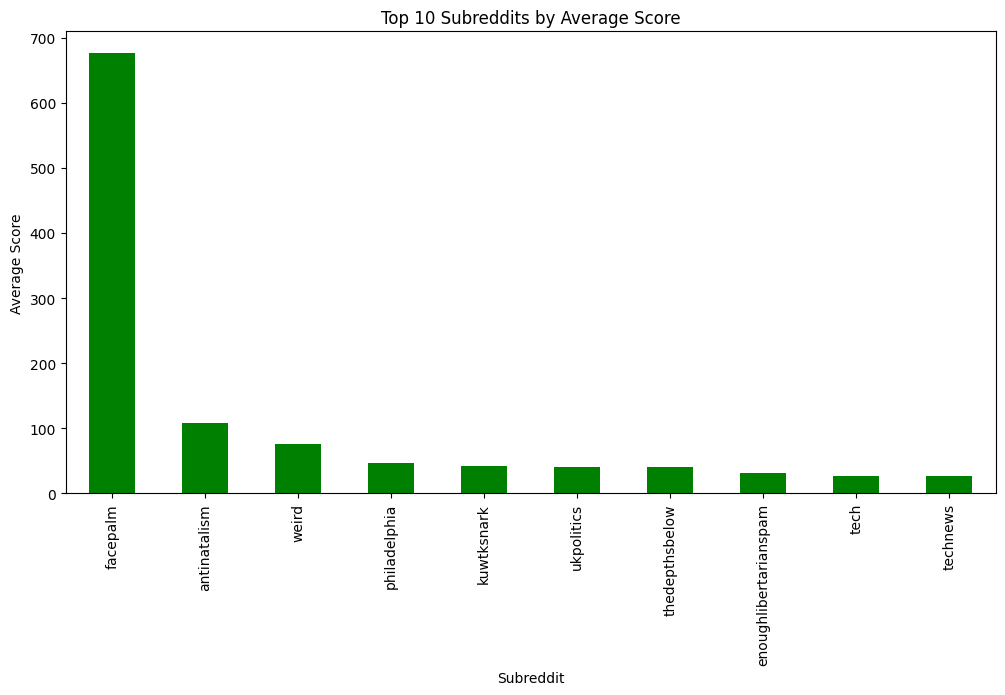

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('./final_dataset.csv')  # Replace with the actual file path

# Subreddit Popularity
plt.figure(figsize=(12, 6))
subreddit_scores = df.groupby('subreddit.name')['score'].mean().sort_values(ascending=False)
subreddit_scores[:10].plot(kind='bar', color='green')
plt.title('Top 10 Subreddits by Average Score')
plt.xlabel('Subreddit')
plt.ylabel('Average Score')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulpudurkar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahulpudurkar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rahulpudurkar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


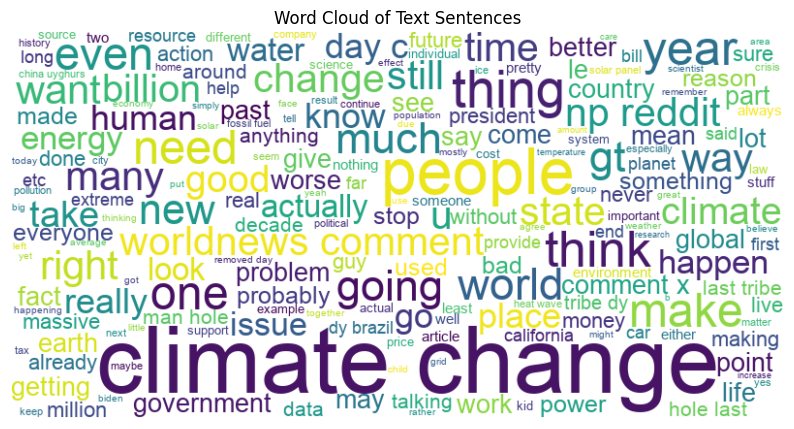

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv('./final_dataset.csv')

# Drop rows with missing values
df.dropna(inplace=True)
# Assuming 'sentiment' column contains continuous values
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x > 0 else (0 if x == 0 else -1))

# Preprocess the text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    words = word_tokenize(text)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['body'] = df['body'].apply(preprocess_text)

# Generate word cloud from 'body' column
text = ' '.join(df['body'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', prefer_horizontal=1.0, font_path='/Library/Fonts/Arial.ttf').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Sentences')
plt.show()